
### This file is a cross validation of the two models Linear Regression and Random Forest. I implemented In R the complete set of models explored for testing purpose. Random forest is the selected model for the predictions on the restaurants score
### 20 FOLD CROSS VALIDATION IS USED HERE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [17]:
my_data=pd.read_csv("InspectionsInOrder.csv")

In [27]:
X=my_data.loc[:,'INSPECTION1':'INSPECTION32']

In [28]:
X.head()

,INSPECTION1,INSPECTION2,INSPECTION3,INSPECTION4,INSPECTION5,INSPECTION6,INSPECTION7,INSPECTION8,INSPECTION9,INSPECTION10,...,INSPECTION23,INSPECTION24,INSPECTION25,INSPECTION26,INSPECTION27,INSPECTION28,INSPECTION29,INSPECTION30,INSPECTION31,INSPECTION32
0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,5,5,10,10,7
1,12,12,12,12,12,12,12,12,12,12,...,12,11,13,12,11,12,10,13,10,12
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,12,8,10,12,12,10,8
3,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,13,8,8,13,13,10
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [29]:
y=my_data.loc[:,'INSPECTION33']

In [30]:
y.head()

0     7
1    13
2    10
3    10
4    10
Name: INSPECTION33, dtype: int64

In [41]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=20, scoring='neg_mean_squared_error')
print(scores)

[-6.22787805e+00 -5.18801580e+00 -5.81296529e+00 -5.65522560e+00
 -5.89290944e+00 -2.75432616e+01 -6.41564972e+00 -6.35051845e+00
 -2.11012482e+01 -1.10492994e+03 -5.35857890e+00 -9.86407405e+00
 -1.30403786e+01 -4.87520802e+00 -4.37456416e+00 -2.85303484e+00
 -2.46201880e+00 -1.63798032e+00 -5.39814020e-01 -6.05855825e-02]


In [42]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[6.22787805e+00 5.18801580e+00 5.81296529e+00 5.65522560e+00
 5.89290944e+00 2.75432616e+01 6.41564972e+00 6.35051845e+00
 2.11012482e+01 1.10492994e+03 5.35857890e+00 9.86407405e+00
 1.30403786e+01 4.87520802e+00 4.37456416e+00 2.85303484e+00
 2.46201880e+00 1.63798032e+00 5.39814020e-01 6.05855825e-02]


In [43]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 2.49557169  2.27772162  2.41100918  2.37807182  2.42753155  5.24816745
  2.53291329  2.5200235   4.5936095  33.24048641  2.31486045  3.14071235
  3.61114644  2.20798732  2.09154588  1.6890929   1.56908215  1.27983605
  0.73472037  0.24614139]


In [44]:
# calculate the average RMSE
rmse_scores.mean()

3.9505115661164067

In [51]:
features=X
labels=y

In [52]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [53]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [54]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'SCORE.')

Mean Absolute Error: 1.96 SCORE.


In [62]:
feature_list = list(features.columns)

In [63]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: INSPECTION3          Importance: 0.23
Variable: INSPECTION2          Importance: 0.05
Variable: INSPECTION9          Importance: 0.05
Variable: INSPECTION1          Importance: 0.04
Variable: INSPECTION6          Importance: 0.04
Variable: INSPECTION28         Importance: 0.04
Variable: INSPECTION29         Importance: 0.04
Variable: INSPECTION30         Importance: 0.04
Variable: INSPECTION31         Importance: 0.04
Variable: INSPECTION32         Importance: 0.04
Variable: INSPECTION8          Importance: 0.03
Variable: INSPECTION15         Importance: 0.03
Variable: INSPECTION18         Importance: 0.03
Variable: INSPECTION25         Importance: 0.03
Variable: INSPECTION26         Importance: 0.03
Variable: INSPECTION27         Importance: 0.03
Variable: INSPECTION4          Importance: 0.02
Variable: INSPECTION5          Importance: 0.02
Variable: INSPECTION10         Importance: 0.02
Variable: INSPECTION19         Importance: 0.02
Variable: INSPECTION23         Importanc

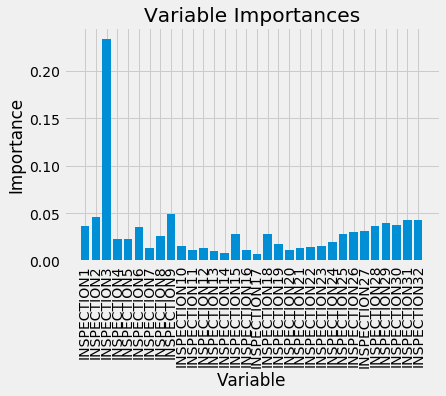

In [73]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [56]:
scores = cross_val_score(rf, X, y, cv=20, scoring='neg_mean_squared_error')
print(scores)

[-18.17284447 -13.04764244 -17.36999984 -14.66787823 -14.70175324
 -15.02285228 -13.10881389 -18.33232927 -18.8776447  -16.49976531
 -15.05469061 -17.09464548 -17.88413224 -17.26771641 -10.95014886
 -10.22655485  -9.59559162  -8.19862154  -2.61430679  -0.12173221]


In [59]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[18.17284447 13.04764244 17.36999984 14.66787823 14.70175324 15.02285228
 13.10881389 18.33232927 18.8776447  16.49976531 15.05469061 17.09464548
 17.88413224 17.26771641 10.95014886 10.22655485  9.59559162  8.19862154
  2.61430679  0.12173221]


In [60]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[4.26296194 3.61215205 4.16773318 3.82986661 3.83428654 3.87593244
 3.6206096  4.28162694 4.34484116 4.06199031 3.88003745 4.13456715
 4.2289635  4.15544419 3.30910091 3.19789851 3.0976752  2.86332351
 1.61688181 0.34890143]


In [61]:
rmse_scores.mean()

3.5362397210559813